In [1]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import importlib
import pickle  # Use this to save results so we don't need to rerun experiments
rf = importlib.import_module("random-forests")
misclass_rate = rf.random_forests.misclassification_rate
cmap = {"iris": "blue", "wine": "purple", "heart": "red", "titanic": "green", "breast": "orange"}
def comp_mean_sd(arr):
    return np.array([np.mean(arr), np.std(arr)])
def get_mean_sd(results):
    ret = {}
    for k in results.keys():
        ret[k] = np.apply_along_axis(comp_mean_sd, 1, results[k])
    return ret

In [2]:
wine = np.loadtxt("wine.data", delimiter=",")
iris = np.loadtxt("iris_csv.csv", dtype=str, delimiter=",")
heart = np.loadtxt("processed.cleveland.data", dtype=str, delimiter=",")
titanic = pd.read_csv("titanic.csv").drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).dropna()
breast = np.loadtxt("breast-cancer.data", delimiter=",", dtype=str)

In [3]:
def str_in_arr(arr, str):
    return not np.isin(str, arr)
barr_breast = np.apply_along_axis(str_in_arr, 1, breast, "?")
breast = breast[barr_breast, :]
barr_heart = np.apply_along_axis(str_in_arr, 1, heart, "?")
heart = heart[barr_heart, :]
heart = heart.astype(float)

In [4]:
# Separate into data and labels
iris_data = iris[1:, :4].astype(float)
iris_labels = iris[1:, 4]
wine_data = wine[:, 1:]
wine_labels = wine[:, 0].astype(int)
heart_data = heart[:, :-1]
heart_labels = heart[:, -1].astype(int)
# Turn heart_labels into array of 0, 1.
# 1 indicates presence of any type of heart disease, 0 indicates no presence
heart_labels_barr = heart_labels >= 1
heart_labels[heart_labels_barr] = 1
breast_data = breast[:, 1:]
breast_labels = breast[:, 0]
titanic_data = titanic.loc[:, titanic.columns!="Survived"].to_numpy()  # feature_type: complex
titanic_labels = titanic["Survived"].to_numpy()

In [5]:
iris_ftype = "continuous"
heart_ftype = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])
wine_ftype = "continuous"
breast_ftype = "categorical"
titanic_ftype = np.array([1, 1, 0, 0, 0, 0, 1])

In [6]:
np.random.seed(1)
datasets = {"iris": (*train_test_split(iris_data, iris_labels, stratify=iris_labels), "continuous"),
            "wine": (*train_test_split(wine_data, wine_labels, stratify=wine_labels), "continuous"),
            "heart": (*train_test_split(heart_data, heart_labels, stratify=heart_labels), heart_ftype),
            "titanic": (*train_test_split(titanic_data, titanic_labels, stratify=titanic_labels), titanic_ftype),
            "breast" : (*train_test_split(breast_data, breast_labels, stratify=breast_labels), "categorical")}

In [7]:
# Create an example plot for n_trees = 1-20 with error bars
ntrees = np.arange(1, 21)
# number of experiments to run for each parameter choice
nexp = 10
results = {}

In [8]:
dataset = "iris"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [9]:
dataset = "wine"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [10]:
dataset = "heart"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [11]:
dataset = "titanic"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [12]:
dataset = "breast"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100)
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results[dataset] = result

In [13]:
mean_sd = get_mean_sd(results)

In [14]:
# Create an example plot for n_trees = 1-20 with error bars
ntrees = np.arange(1, 21)
# number of experiments to run for each parameter choice
nexp = 10
results_weighted = {}

In [15]:
dataset = "iris"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100,criterion="gini_weighted")
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results_weighted[dataset] = result

In [16]:
dataset = "wine"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100,criterion="gini_weighted")
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results_weighted[dataset] = result

In [17]:
dataset = "heart"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100,criterion="gini_weighted")
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results_weighted[dataset] = result

In [18]:
dataset = "titanic"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100,criterion="gini_weighted")
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results_weighted[dataset] = result

In [19]:
dataset = "breast"
X_train, X_test, y_train, y_test, ftype = datasets[dataset]
result = np.empty((len(ntrees), nexp), dtype=float)
m_feats = int(np.floor(np.sqrt(X_train.shape[1])))
n_cand = 3*m_feats
np.random.seed(1)
for i, ntree in enumerate(ntrees):
    for j in range(nexp):
        random_forest = rf.RandomForest(n_trees=ntree, n_candidates=n_cand, max_depth=100,criterion="gini_weighted")
        random_forest.fit(X_train, y_train, feature_type=ftype, m_features=m_feats)
        result[i, j] = misclass_rate(random_forest.predict(X_test), y_test)
results_weighted[dataset] = result

In [20]:
mean_sd_weighted = get_mean_sd(results_weighted)

In [21]:
diff = {}

for i in mean_sd_weighted.keys() & mean_sd.keys():
    diff[i] = mean_sd_weighted[i] - mean_sd[i]

diff


{'iris': array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]),
 'heart': array([[ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [

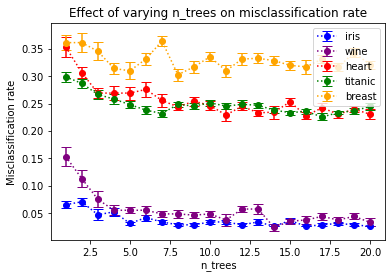

In [22]:
for dataset, m_sd in mean_sd_weighted.items():
    plt.errorbar(ntrees, m_sd[:, 0], yerr=m_sd[:, 1]/np.sqrt(nexp), label=dataset, capsize=5, fmt="o:", c=cmap[dataset])
plt.xlabel("n_trees")
plt.ylabel("Misclassification rate")
plt.title("Effect of varying n_trees on misclassification rate")
plt.legend()

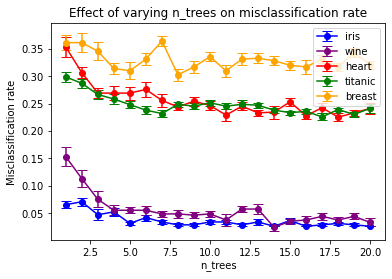

In [23]:
for dataset, m_sd in mean_sd.items():
    plt.errorbar(ntrees, m_sd[:, 0], yerr=m_sd[:, 1]/np.sqrt(nexp), label=dataset, capsize=5, fmt="o-", c=cmap[dataset])
plt.xlabel("n_trees")
plt.ylabel("Misclassification rate")
plt.title("Effect of varying n_trees on misclassification rate")
plt.legend()

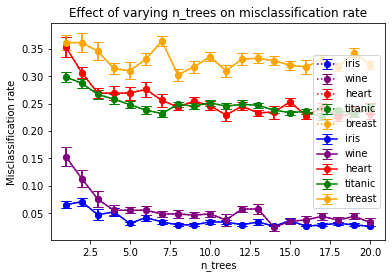

In [24]:
# Loop over mean_sd_weighted dictionary
for dataset, m_sd in mean_sd_weighted.items():
    plt.errorbar(ntrees, m_sd[:, 0], yerr=m_sd[:, 1]/np.sqrt(nexp), label=dataset, capsize=5, fmt="o:", c=cmap[dataset])

# Loop over mean_sd dictionary
for dataset, m_sd in mean_sd.items():
    plt.errorbar(ntrees, m_sd[:, 0], yerr=m_sd[:, 1]/np.sqrt(nexp), label=dataset, capsize=5, fmt="o-", c=cmap[dataset])

# Add labels and title
plt.xlabel("n_trees")
plt.ylabel("Misclassification rate")
plt.title("Effect of varying n_trees on misclassification rate")

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [28]:
def plot(dataset):
    m_sds = mean_sd[dataset]
    m_sds_weighted = mean_sd_weighted[dataset]
    style = {0: "^-.", 1: "o-"}
    labels = {0: "gini", 1: "gini_weighted"}
    for i in range(2):
        if i == 0:
            plt.errorbar(ntrees, m_sds[:, 0], yerr=m_sds[:, 1]/np.sqrt(nexp), capsize=5, fmt=style[i],  c=cmap[dataset], label=labels[i])
        else:
            plt.errorbar(ntrees, m_sds_weighted[:, 0], yerr=m_sds[:, 1]/np.sqrt(nexp), capsize=5, fmt=style[i],  c=cmap[dataset], label=labels[i])

    plt.legend()
    plt.ylabel("Misclassification rate")
    plt.xlabel("n_trees")
    plt.title("Effect of m_features on misclassification rate")

    plt.axis([0,20,0,0.5])

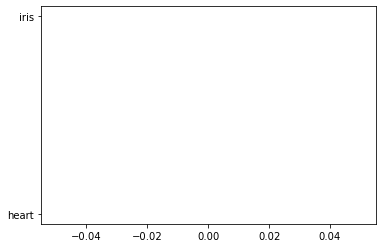

In [46]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], linestyle="-", color='k'),
                Line2D([0], [0], linestyle=":", color='k'),
                Line2D([0], [0], color='blue'),
                Line2D([0], [0], color='purple'),
                Line2D([0], [0], color='red'),
                Line2D([0], [0], color='green'),
                Line2D([0], [0], color='orange')]

def plot2():
    style = {0: "x:", 1: "o-"}
    labels = {0: "gini", 1: "gini_weighted"}    
    for dataset in results.keys():
        if dataset == "mushroom":
            continue
        m_sds = mean_sd[dataset]
        m_sds_weighted = mean_sd_weighted[dataset]
        for i in range(2):
            if i == 0:
                plt.errorbar(ntrees, m_sds[:, 0], yerr=m_sds[:, 1]/np.sqrt(nexp), capsize=5, fmt=style[i],  c=cmap[dataset], label=labels[i])
            else:               
                plt.errorbar(ntrees, m_sds_weighted[:, 0], yerr=m_sds[:, 1]/np.sqrt(nexp), capsize=5, fmt=style[i],  c=cmap[dataset], label=labels[i])

                

    plt.legend(custom_lines, ["gini", "gini_weighted", "iris",
                              "wine", "heart", "titanic", "breast"], ncol=2)
    plt.ylabel("Misclassification rate")
    plt.xlabel("n_trees")
    plt.title("gini vs gini_weighted")
    plt.axis([0.5,20,0,0.6])

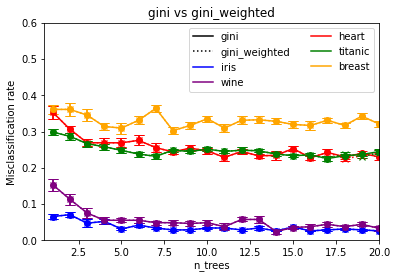

In [47]:
plot2()